## Kidney Disease DataSet

### Step - 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler

### Step - 2 Loading Kidney Disease DataSet

In [3]:
df = pd.read_csv(r"C:\Users\Vignesh\Downloads\kidney_disease - kidney_disease.csv")


### Step - 3 Inspecting Data

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

### Step - 4 Data Cleaning
### Handling Missing Values
### Change DataType

In [10]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
df.duplicated().sum()   # No duplicates in Kidney_diesease 

np.int64(0)

In [12]:
df.columns = df.columns.str.strip().str.lower()

In [13]:
num_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid values become NaN

# Step 5: Impute missing values
# Numeric columns → median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns → mode
cat_cols = ['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

### Step - 5 Convert Numerical and Categorical columns

In [14]:
# Convert numeric columns that are wrongly stored as object
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Convert categorical columns
categorical_cols = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']
df[categorical_cols] = df[categorical_cols].astype('category')

# Convert age to int if no decimals
df['age'] = df['age'].astype('int64')


### Step - 6 Encode Categorical columns

In [15]:
#  Encode categorical columns (map to 0/1)
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['dm'] = df['dm'].map({'yes': 1, 'no': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})
df['sg'] = pd.to_numeric(df['sg'], errors='coerce')  # sometimes stored as string
df['al'] = pd.to_numeric(df['al'], errors='coerce')
df['su'] = pd.to_numeric(df['su'], errors='coerce')


In [16]:
# Step 7: Impute again if any conversion caused NaNs
for col in ['sg','al','su']:
    df[col] = df[col].fillna(df[col].median())

### Step - 7 Feature Scaling

In [17]:
#  Scale numeric features
scaler = StandardScaler()
df[num_cols + ['sg','al','su']] = scaler.fit_transform(df[num_cols + ['sg','al','su']])


In [18]:
df.drop(['id'], axis=1, inplace=True) 

### Step - 8 Identify Feature and Target

In [19]:
X = df.drop('classification', axis=1)
y = df['classification'].map({'ckd':1, 'notckd':0})  # binary target


### Step - 9 Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Step - 10 Train Model

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Step - 11 Predict Model

In [22]:
y_pred = model.predict(X_test)


### Step - 12 Evaluate Model

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# ✅ Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# ✅ Classification Report (includes precision, recall, f1-score for each class)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Individual metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9875

Confusion Matrix:
 [[30  0]
 [ 1 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Precision: 1.0
Recall: 0.98
F1 Score: 0.98989898989899


### Step - 13 Visualization

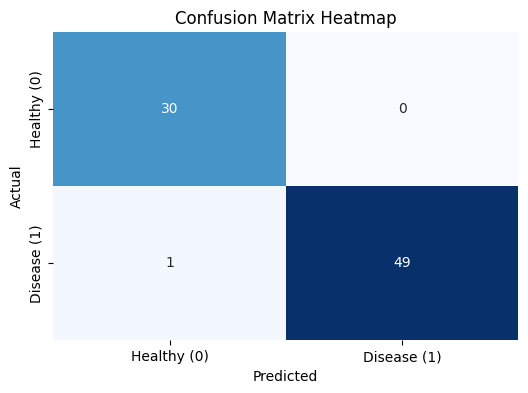

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Healthy (0)", "Disease (1)"],
            yticklabels=["Healthy (0)", "Disease (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [27]:
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ✅ Step 1: Split data first
X = df.drop('classification', axis=1)
y = df['classification'].map({'ckd': 1, 'notckd': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 2: Scale only training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 3: Train the model
model = LogisticRegression(max_iter=100)
model.fit(X_train_scaled, y_train)

# ✅ Step 4: Evaluate (optional)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# ✅ Step 5: Save model and scaler
os.makedirs("models", exist_ok=True)

with open("models/kidney_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("models/kidney_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully!")


Accuracy: 0.9875
✅ Model and Scaler saved successfully!
